### **Autocorrelation**
- Identifying Patterns: Autocorrelation helps identify recurring patterns in business metrics. 

### **Cross-Correlation**
- Identifying Leading Indicators: Cross-correlation can reveal which business metrics are leading indicators for others. 


### **Volatility**
- Risk Assessment: Volatility in key business metrics like revenue or cash flow is a crucial measure of business risk. 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, ccf
from arch import arch_model
import yfinance as yf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="yfinance")



**Using financial data from a company, we can identify patterns, leading indicators, and assess risk.**

#### Get stocks that belong to the same industry and different industries

- **Same Industry**: Apple, Microsoft, and Google belong to the technology industry.
- **Different Industries**: Apple, Walmart, and Coca-Cola belong to different industries.

In [2]:
apple = yf.Ticker("AAPL")
apple_hist = apple.history(period="1y")
apple_hist = apple_hist['Close']

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="1y")
msft_hist = msft_hist['Close']

goog = yf.Ticker("GOOG")
goog_hist = goog.history(period="1y")
goog_hist = goog_hist['Close']

walmart = yf.Ticker("WMT")
walmart_hist = walmart.history(period="1y")
walmart_hist = walmart_hist['Close']

coke = yf.Ticker("KO")
coke_hist = coke.history(period="1y")
coke_hist = coke_hist['Close']



## **I. AutoCorrelation** 

Autocorrelation:


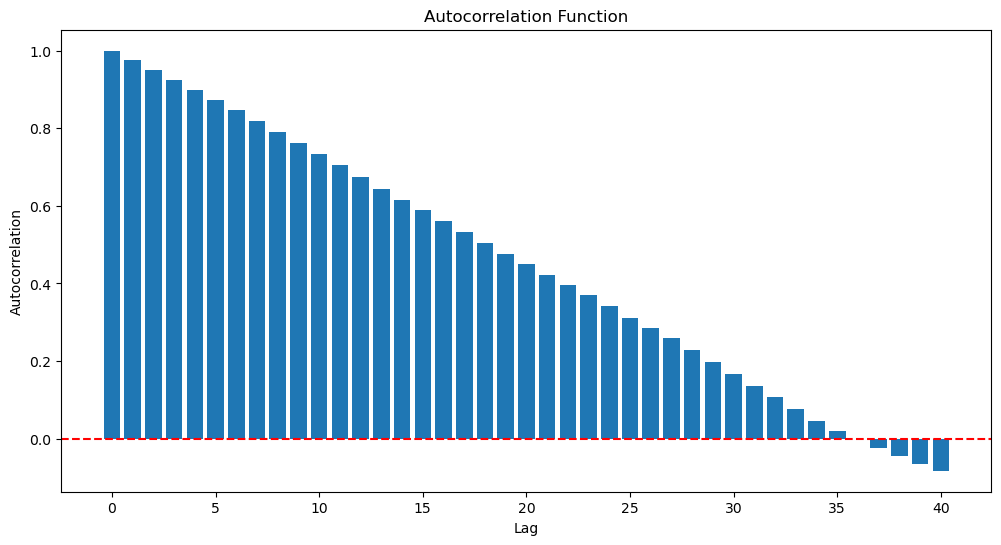

In [3]:
# 1. Autocorrelation
def plot_autocorrelation(series, lags=40):
    acf_values = acf(series, nlags=lags)
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(acf_values)), acf_values)
    plt.title('Autocorrelation Function')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

print("Autocorrelation:")
plot_autocorrelation(apple_hist)

1. **Decay of Autocorrelation**: The plot shows a gradual decay in the autocorrelation as the lag increases. This pattern is typical for many financial time series, where observations close together in time are more correlated than those further apart.

2. **Significance Level**: The dotted red line typically represents the significance threshold, beyond which correlations can be considered statistically significant. In your plot, this line appears close to zero, which means that most of the autocorrelations for various lags are statistically significant.

3. **Implications for Modeling**:
   - **Non-Stationarity**: The slow decay suggests that the series might be non-stationary, meaning the mean, variance, and autocorrelation do not remain constant over time. This needs to be tested and potentially corrected through differencing or detrending before modeling.
   - **AR Model Suitability**: Since the autocorrelation is significant for several lags, an autoregressive (AR) model might be suitable for this data. You can use the Partial Autocorrelation Function (PACF) to help determine the order of the AR model.

4. **Practical Steps**:
   - **Stationarity Check**: Perform a unit root test such as the Augmented Dickey-Fuller (ADF) test to confirm if the series is stationary.
   - **Differencing**: If non-stationary, differencing the series once or more might help in achieving stationarity.
   - **Model Fitting**: Fit an AR model or other time series models like ARIMA based on the insights from the ACF and PACF.


**Business Sense:**

1. **Persistent Trends:**
   The gradual decay in autocorrelation suggests that Apple's stock price trends tend to persist over time. This means that if the stock is performing well (or poorly) today, it's likely to continue that trend in the near future.

   Implication: This persistence could inform investment strategies, financial planning, and risk management for the company and its stakeholders.

2. **Market Memory:**
   The significant autocorrelation at multiple lags indicates that the market has a "long memory" when it comes to Apple's stock. Past performance continues to influence future performance for an extended period.

   Implication: This suggests that major company announcements, product launches, or financial reports may have lingering effects on stock price beyond the immediate short term.

3. **Predictability and Volatility:**
   The strong autocorrelation suggests some level of predictability in stock movement, but it also implies that shocks to the system (like unexpected news) might have prolonged effects.

   Implication: This could influence how the company times its major announcements or strategic moves, considering the potentially extended impact on stock price.

**Product Sense:**

1. Product Lifecycle Impact:
   The persistent autocorrelation might reflect the extended impact of product lifecycles on Apple's valuation. New product launches or updates could have effects that last for multiple time periods.

   Implication: This underscores the importance of consistent product innovation and the potential long-term impact of product successes or failures on company valuation.

2. **Market Sentiment Inertia:**
   The slow decay in autocorrelation could indicate that market sentiment about Apple's products tends to persist. Positive reception of a new product might buoy the stock price for an extended period, and vice versa.

   Implication: This emphasizes the need for maintaining product quality and customer satisfaction, as their effects on stock price (and thus company valuation) may be long-lasting.

3. **Seasonal Patterns:**
   While not explicitly shown in this plot, autocorrelation can reveal seasonal patterns in stock performance, which for a company like Apple, might align with product release cycles or holiday shopping seasons.

   Implication: This could inform product release schedules, marketing campaigns, and production planning to maximize positive impact on company valuation.

For Executives and Decision-Makers:

1. **Strategic Planning:**
   The persistent trends suggest that strategic decisions (like entering new markets or product categories) may have long-lasting effects on company valuation. This underscores the need for careful, forward-looking planning.

2. **Risk Management:**
   The "long memory" of the market for Apple's stock means that negative events could have prolonged effects. This highlights the importance of proactive risk management and quick, effective responses to crises.

3. **Communication Strategy:**
   Given the persistent influence of past performance, maintaining consistent and transparent communication with investors becomes crucial. Regular updates on product performance, market strategy, and financial health can help manage market expectations and sentiment.

4. **Innovation Imperative:**
   The extended impact of company performance on stock price reinforces the need for continuous innovation. In Apple's case, this means not just creating new products, but also continuously improving existing product lines to maintain positive market sentiment.

5. **Performance Metrics:**
   When evaluating the success of new products or initiatives, executives should consider not just immediate impact but also effects over an extended period, given the autocorrelation in stock performance.

6. **Adaptive Strategies:**
   While the autocorrelation suggests some predictability, the non-stationarity implies that the market environment is continually evolving. This calls for adaptive strategies that can respond to changing market conditions while leveraging the momentum of past successes.

Autocorrelation analysis provides valuable insights into how Apple's past performance influences its future stock behavior. It underscores the importance of consistent performance, strategic long-term planning, and the potentially extended impact of major business decisions on company valuation. For product managers, it highlights the lasting effects of product successes or failures, emphasizing the need for sustained innovation and quality in maintaining positive market sentiment.

## **II. Cross-Correlation**


Cross-correlation with similar industries (Microsoft & Alphabet):


C:\Users\james\AppData\Local\Temp\ipykernel_10512\1806158226.py:3: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  ccf_values = ccf(series1, series2, unbiased=True)


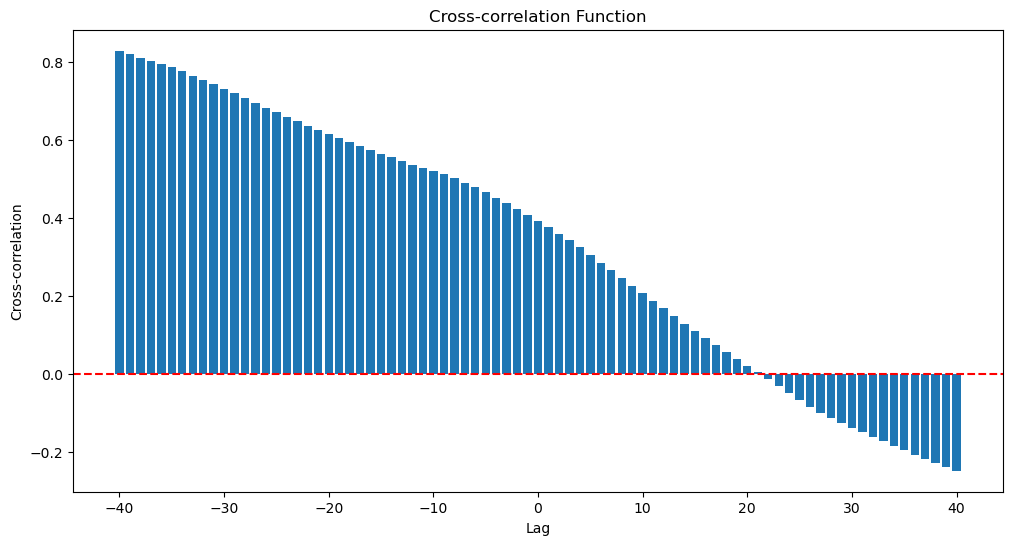


Cross-correlation with dissimilar industries (Apple & Coca Cola):


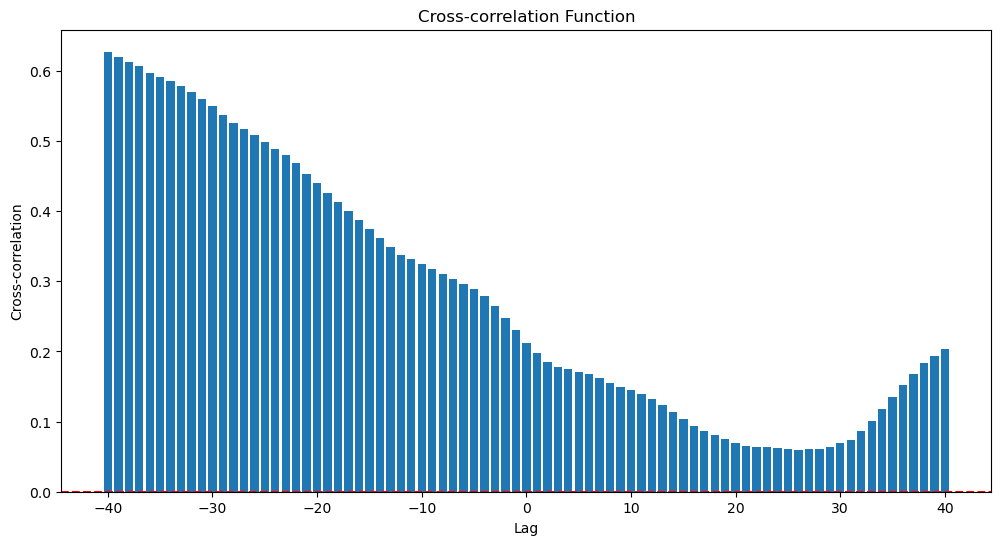

In [5]:
# 2. Cross-correlation
def plot_cross_correlation(series1, series2, lags=40):
    ccf_values = ccf(series1, series2, unbiased=True)
    plt.figure(figsize=(12, 6))
    plt.bar(range(-lags, lags+1), ccf_values[lags-40:lags+41])
    plt.title('Cross-correlation Function')
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

print("\nCross-correlation with similar industries (Microsoft & Alphabet):")
plot_cross_correlation(msft_hist, goog_hist)

print("\nCross-correlation with dissimilar industries (Apple & Coca Cola):")
plot_cross_correlation(apple_hist, coke_hist)


### 1. Microsoft and Alphabet (Similar Industries)
- **Correlation Pattern**: The first chart shows a significant positive correlation that gradually decreases as the lag increases or decreases from zero. This suggests that the stock movements of Microsoft and Alphabet are closely aligned, with the highest correlation at no lag. This is expected as both companies are major players in the technology sector and may react similarly to market conditions, technological advancements, and economic factors affecting the tech industry.
- **Symmetry about Lag 0**: The symmetric pattern around lag 0 indicates that neither stock consistently leads or lags the other significantly on a regular basis; rather, their movements are synchronously related.
- **Statistical Significance**: Assuming the dotted red line represents the significance threshold, most of the lags, especially near zero, are significant, indicating a reliable correlation between these two stocks at those lags.

### 2. Apple and Coca-Cola (Dissimilar Industries)
- **Correlation Pattern**: The second chart shows a different pattern with a gradual decrease in correlation as the lag moves away from zero, but less pronounced than in the Microsoft-Alphabet pair. Notably, there’s a slight increase in correlation at the extreme positive and negative lags.
- **Less Correlation**: The overall level of correlation is lower compared to the Microsoft and Alphabet pair, which is expected since Apple and Coca-Cola operate in very different industries (technology vs. consumer goods). The economic factors affecting one may not similarly affect the other.
- **Potential Cyclical Patterns**: The slight increase in correlation at both ends of the lag spectrum could suggest some cyclical or seasonal patterns that affect both stocks similarly, albeit weakly. This might need further exploration to understand any indirect connections or common economic indicators influencing both.

### Key Insights
- **Industry Influence**: Companies within the same industry, like Microsoft and Alphabet, exhibit stronger and more significant correlations in their stock price movements compared to companies from different industries like Apple and Coca-Cola.
- **Cross-industry Analysis**: While generally lower, significant cross-correlations at specific lags between dissimilar companies can reveal interesting economic or market dynamics that might not be immediately apparent.

### Recommendations for Further Analysis
- **Conducting Stationarity Tests**: Ensure that the stock prices are stationary before performing correlation analyses to avoid spurious results.
- **Exploring External Factors**: Look into market or macroeconomic events that could cause the observed increases in cross-correlation at specific lags, especially for Apple and Coca-Cola.
- **Modeling Considerations**: If using these correlations to inform trading strategies or risk management, consider dynamic models that can account for changes in correlation over time.

**Business Sense:**

1. **Industry Alignment (Microsoft and Alphabet):**
   The strong, symmetric correlation between Microsoft and Alphabet indicates that these companies' fortunes are closely tied. This reflects their similar positioning in the tech industry and their exposure to similar market forces.

   **Implications:**
   - Competitive Strategy: Changes in one company's performance or strategy are likely to affect the other. This necessitates close monitoring of each other's moves.
   - Risk Management: Diversification within the tech sector may not provide significant risk reduction due to this high correlation.
   - Market Trends: Both companies can serve as bellwethers for the tech industry. Their performance can indicate broader tech sector trends.

2. **Cross-Industry Dynamics (Apple and Coca-Cola):**
   The weaker correlation between Apple and Coca-Cola reflects their operation in different industries. However, the existence of some correlation suggests shared influences.

   **Implications:**
   - Diversification: Including companies from different sectors in a portfolio can provide better risk diversification.
   - Macroeconomic Indicators: The weak correlation might be due to shared sensitivity to broader economic factors like consumer spending or global economic health.
   - Potential for Cross-Industry Insights: Understanding why these seemingly unrelated companies show some correlation could reveal unexpected business insights or opportunities.

3. **Market Synchronicity:**
   The highest correlation at lag zero for both pairs indicates that market information is generally quickly incorporated into stock prices across different sectors.

   **Implications:**
   - Rapid Response Needed: Companies need to be prepared to respond quickly to market-moving events, as effects are often immediate across industries.
   - Transparency in Communication: Clear and timely communication of significant business developments is crucial, as markets react swiftly.

**Product Sense:**

1. **Tech Industry Synergies (Microsoft and Alphabet):**
   The high correlation suggests that product successes or failures in one company might have ripple effects on the other.

   **Implications:**
   - Product Development: Innovations or new product launches by one company might create market expectations for the other to follow suit.
   - Market Saturation: If one company saturates a market segment, it might limit growth opportunities for the other in that area.
   - Collaborative Opportunities: The strong correlation might indicate potential for collaborative products or services that could benefit both companies.

2. **Cross-Industry Product Insights (Apple and Coca-Cola):**
   The weaker but existent correlation suggests some shared consumer behavior patterns despite different product categories.

   **Implications:**
   - Consumer Behavior: There might be underlying consumer trends affecting both tech products and consumer goods, offering opportunities for cross-industry learning.
   - Brand Value: Both being strong global brands, their correlation might reflect the importance of brand perception across different product categories.
   - Innovation Opportunities: Understanding the factors causing correlation could inspire cross-industry innovation or marketing strategies.

3. **Product Launch Timing:**
   The symmetry around lag zero suggests that timing of product launches or major announcements might have industry-wide effects.

   **Implications:**
   - Strategic Timing: Carefully timing product launches to either ride industry-wide positive trends or to differentiate during downturns.
   - Anticipating Competitor Moves: In highly correlated industries, companies should be prepared for quick responses to competitor product launches.

**Key Takeaways for Executives and Decision-Makers:**

1. **Industry Ecosystem Awareness:** Especially in tech, company performances are closely interlinked. Decisions should consider the broader industry ecosystem.

2. **Diversification Strategies:** For investment or partnership decisions, consider the degree of correlation between industries to achieve true diversification.

3. **Rapid Market Adaptation:** Markets react quickly across sectors. Develop agile decision-making processes to respond to market changes promptly.

4. **Cross-Industry Learning:** Even seemingly unrelated industries can offer valuable insights. Encourage cross-industry analysis and learning.

5. **Product Strategy Alignment:** Align product strategies with industry trends while looking for opportunities to differentiate, especially in highly correlated markets.

6. **Consumer Trend Analysis:** Look for underlying consumer trends that might affect multiple industries, as indicated by correlations between diverse companies.

7. **Risk Management:** Understand that risks in one part of a highly correlated industry can quickly spread. Develop comprehensive risk management strategies.

8. **Innovation Opportunities:** Use cross-industry correlations to identify unexpected areas for innovation or collaboration.

## **III. Volatility Analysis**


Volatility Walmart:


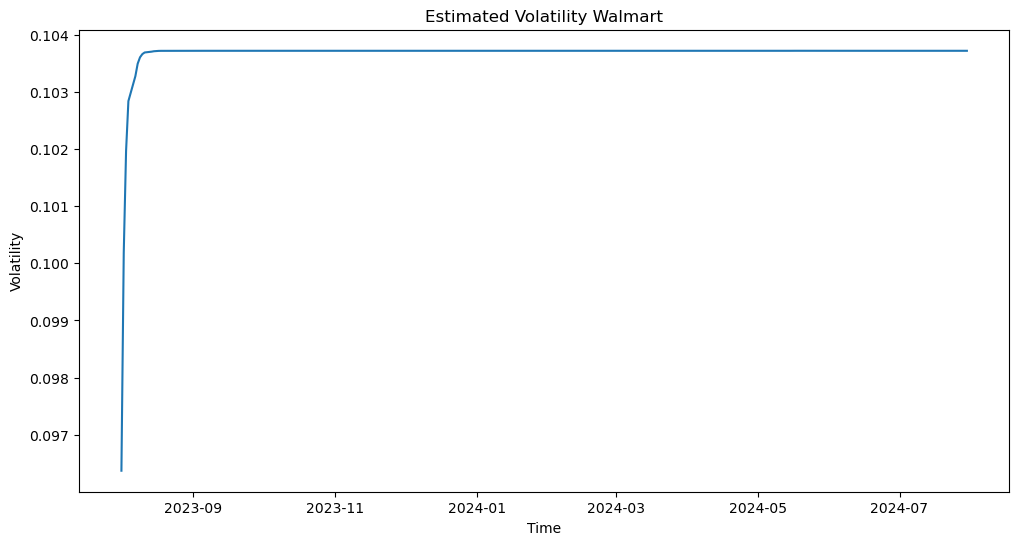


Volatility Coca Cola:


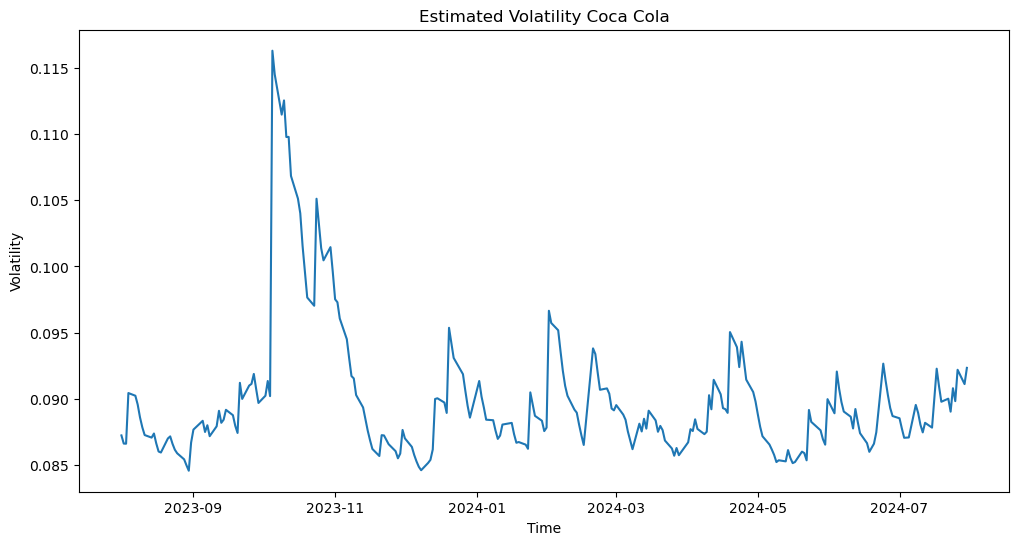


Volatility Apple:


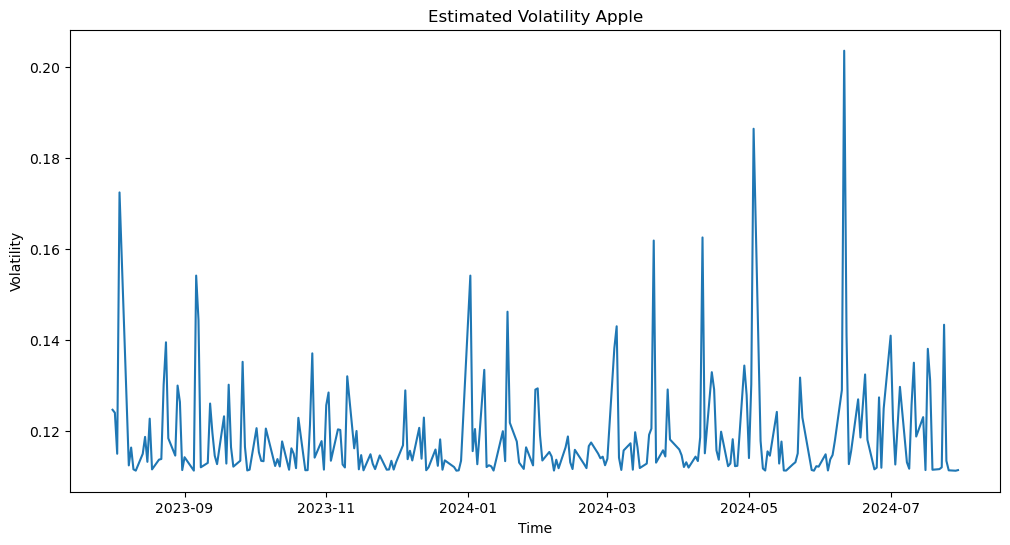

In [13]:

warnings.filterwarnings("ignore")

# 3. Volatility
def calculate_returns(series):
    return np.diff(series) / series[:-1]

def plot_volatility(returns, title = None):
    model = arch_model(returns, vol='GARCH', p=1, q=1)
    results = model.fit(disp='off')
    
    plt.figure(figsize=(12, 6))
    plt.plot(np.sqrt(results.conditional_volatility))
    plt.title(f'Estimated Volatility {title}')
    plt.xlabel('Time')
    plt.ylabel('Volatility')
    plt.show()

returns = calculate_returns(walmart_hist)
print("\nVolatility Walmart:")
plot_volatility(returns, title='Walmart')

returns = calculate_returns(coke_hist)
print("\nVolatility Coca Cola:")
plot_volatility(returns, title='Coca Cola')


returns = calculate_returns(apple_hist)
print("\nVolatility Apple:")
plot_volatility(returns, title='Apple')

### 1. Walmart Volatility
- **Graph Characteristics**: The volatility graph for Walmart shows an immediate drop at the beginning of the observed period and then stabilizes at a lower level throughout the remaining months.
- **Interpretation**: The sharp decrease might indicate a particular event or market condition that initially caused high volatility, which then normalized. Walmart's resulting steady, low volatility reflects a stable market perception and less risky investment during this period.

### 2. Coca Cola Volatility
- **Graph Characteristics**: Coca Cola's volatility shows significant spikes, particularly around the beginning, with a peak and then gradually decreases, although it remains somewhat erratic, with smaller peaks later on.
- **Interpretation**: The fluctuations in Coca Cola's volatility could suggest responses to external market events or company-specific news that impacted investor sentiment periodically. This pattern shows more market risk compared to Walmart but indicates active trading opportunities due to the fluctuating volatility.

### 3. Apple Volatility
- **Graph Characteristics**: Apple shows a highly volatile pattern with numerous sharp spikes throughout the period.
- **Interpretation**: The frequent and high volatility spikes reflect Apple's sensitivity to news, market trends, and possibly product release cycles or other significant events. High volatility indicates higher risk but also potentially higher returns, attracting different investor strategies.

### Technical Notes on Scaling Issues
The warnings about scaling in the data ("DataScaleWarning") suggest that the numerical scale of the volatility measures (y-values) is not ideal for the models used to estimate parameters. This can affect the convergence of optimization algorithms in statistical models:
- **Recommended Action**: Multiplying the volatility data by 100 would bring the scale into a more suitable range for modeling. This rescaling helps in improving the numerical stability and performance of the models.
- **Model Implications**: Without rescaling, there might be issues with model accuracy or the reliability of the volatility estimates.

### Overall Implications for Investment
- **Walmart**: Investors looking for stability might prefer Walmart due to its lower and consistent volatility.
- **Coca Cola**: Investors who can tolerate medium risk might engage with Coca Cola, exploiting the trading opportunities provided by its volatility patterns.
- **Apple**: Suitable for risk-tolerant investors, given its high volatility, which could yield substantial returns on investments sensitive to market news and events.

**Business Sense:**

1. **Walmart:**
   The low, stable volatility suggests a steady, predictable business environment.

   **Implications:**
   - Investor Confidence: Walmart's stability may attract risk-averse investors, potentially lowering capital costs.
   - Strategic Planning: The company can engage in longer-term planning with more confidence due to the stable market perception.
   - Pricing Strategy: Stable volatility might allow for more consistent pricing strategies across products.

2. **Coca-Cola:**
   The fluctuating volatility with occasional spikes indicates a more dynamic market environment.

   **Implications:**
   - Market Sensitivity: Coca-Cola's business appears more sensitive to external factors or company-specific events.
   - Adaptive Strategies: The company might need to be more agile in its business strategies to respond to changing market perceptions.
   - Risk Management: More robust risk management strategies may be necessary to handle periods of higher volatility.

3. **Apple:**
   High and frequent volatility spikes suggest a highly dynamic and reactive business environment.

   **Implications:**
   - Innovation Focus: The volatility might reflect the market's high expectations for continuous innovation.
   - Event-Driven Strategy: Business strategies might need to be closely tied to product launches, earnings reports, and industry events.
   - Investor Communication: More frequent and detailed communication with investors might be necessary to manage expectations and explain volatility.

**Product Sense:**

1. **Walmart:**
   Stable volatility suggests a consistent market reception of Walmart's product offerings.

   **Implications:**
   - Product Line Stability: Walmart might benefit from maintaining a stable, reliable product mix.
   - Gradual Innovation: Product innovations can be introduced more gradually without risking major market disruptions.
   - Supply Chain Focus: With stable demand, the focus can be on optimizing the supply chain for efficiency.

2. **Coca-Cola:**
   Fluctuating volatility indicates varying market reactions to Coca-Cola's product strategies.

   **Implications:**
   - Product Diversification: Coca-Cola might benefit from a diversified product portfolio to balance out market reactions.
   - Seasonal Strategies: Product launches and marketing campaigns might need to be timed with periods of lower volatility.
   - Adaptive Product Development: The company should be prepared to quickly adjust product strategies based on market reception.

3. **Apple:**
   High volatility suggests a market that reacts strongly to Apple's product-related news and launches.

   **Implications:**
   - Product Launch Impact: Each product launch or update can significantly affect market perception and potentially sales.
   - Continuous Innovation Pressure: The volatility might reflect high market expectations for groundbreaking products.
   - Lifecycle Management: Careful management of product lifecycles is crucial, as the market seems to price in future expectations.

**Key Takeaways for Executives and Decision-Makers:**

1. **Risk-Adjusted Strategies:** Tailor business and product strategies to match the company's volatility profile. Walmart can afford more stable, long-term strategies, while Apple may need to be more dynamic and responsive.

2. **Investor Relations:** Adapt communication strategies based on volatility. Companies with higher volatility like Apple may need more frequent updates and guidance to manage investor expectations.

3. **Innovation Pacing:** Match the pace of innovation to market expectations. Apple's high volatility suggests a need for continuous, significant innovations, while Walmart can focus on incremental improvements.

4. **Resource Allocation:** Allocate resources differently based on volatility. Higher volatility companies might need more resources in R&D and market analysis, while lower volatility allows for focus on operational efficiency.

5. **Market Positioning:** Use volatility insights for market positioning. Walmart can emphasize stability and reliability, Coca-Cola can highlight adaptability, and Apple can leverage its dynamic, innovation-driven image.

6. **Product Portfolio Management:** Diversify product portfolios based on volatility. Higher volatility companies might benefit from a wider range of products to balance risks.

7. **Pricing Strategies:** Adjust pricing strategies to volatility. Stable companies like Walmart can maintain consistent pricing, while Apple might have more flexibility for premium pricing on new innovations.

8. **Supply Chain and Operations:** Adapt operational strategies to volatility levels. Stable companies can optimize for efficiency, while high-volatility companies need more flexible, responsive supply chains.
